# **[SEABORN](https://joss.theoj.org/papers/10.21105/joss.03021)**

Es una librería de Python creada sobre *Matplotlib* muy integrada a las estructuras de datos de *pandas*.

Fue creada para facilitar la exploración rápida de datos y mejorar la visualización de las gráficas de Matplotlib.



## **Temas**

Una de las ventajas de Seaborn es que genera gráficas más atractivas que las versiones clásicas de Matplotlib, utilizando temas predefinidos

### Ejemplo

In [1]:
# Importar librería
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importar un conjunto de datos (propinas en restaurantes)
df = sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
# Importar un conjunto de datos (vuelos mensuales)
flights = sns.load_dataset("flights")
flights.head(2)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118


**Tema predefinido Matplotlib**

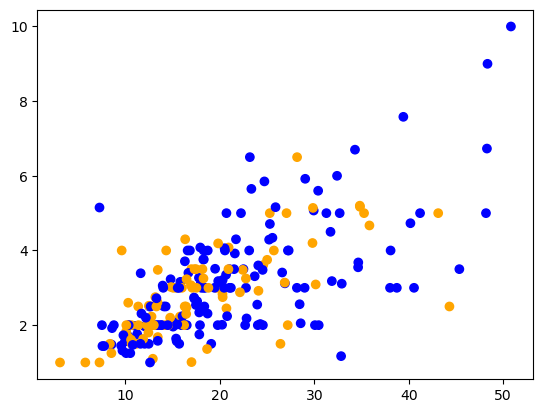

In [4]:
 # Tema predeterminado de Matplotlib
plt.rcParams.update(plt.rcParamsDefault)
colors = ["blue" if s=="Male" else "orange" for s in df["sex"]] # Crear paleta de colores
plt.scatter(df["total_bill"], df["tip"], c=colors)
plt.show()

**Tema Predefinido Seaborn (*darkgrid*)**

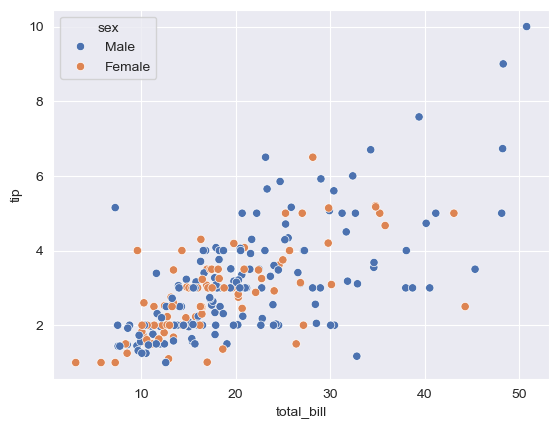

In [5]:
# Activar el tema predeterminado de Seaborn
sns.set_theme(None)
sns.scatterplot(x = "total_bill", y = "tip",
               hue = "sex",
               data = df)
plt.show()

La función


```
sns.set_theme()
```

Cambia la configuración visual de todas las gráficas en matplotlib y seaborn que se hagan a partir de ese momento. Esta función recibe varios argumentos:

* 'style'  Estilo de gráfica
* 'palette' [Paleta de colores](https://seaborn.pydata.org/tutorial/color_palettes.html)
* 'font' Tipo de letra
* 'rc' Diccionario con argumentos personalizados

Los estilos predefinidos que maneja seaborn son:

* 'darkgrid' Fondo gris y líneas blanco
* 'whitegrid' Fondo blanco y líneas grises
* 'dark' Fondo gris, sin líneas
* 'white' Fondo blanco, sin líneas
* 'ticks' Igual a *white* pero agrega marcas en los ejes

En el diccionario 'rc' puede personalizar los diferentes atributos de los ejes, por ejemplo, 'axes.


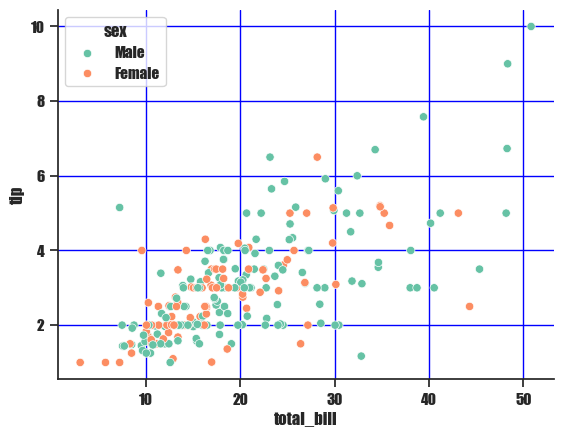

In [6]:
# Activar el tema predeterminado de Seaborn
custom_params = {'axes.spines.top': False,
                 'axes.spines.right': False,
                 "axes.grid": True,
                 "grid.color": "blue"}
sns.set_theme(style="ticks", palette="Set2",
              font="fantasy", rc=custom_params)
sns.scatterplot(x = "total_bill", y = "tip",
               hue = "sex",
               data = df)
plt.show()

Es posible definir estilos propios y guardarlos como diccionario, donde cada etiqueta corresponde a un atributo de **Axes** y su valor es el parámetro específico.

In [7]:
myStyle = {
    'axes.edgecolor': 'red',
    'axes.facecolor': 'LightCyan',
    'axes.grid': True,
    'grid.color': "blue",
    'grid.linestyle': '--',
    'ytick.right': True,
    'axes.spines.right': False,
    'axes.spines.top': False
}

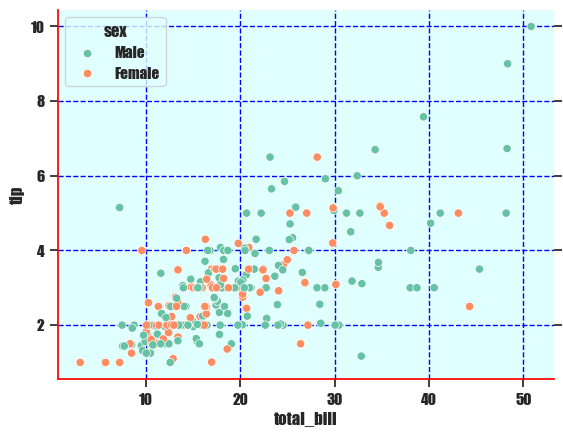

In [8]:
sns.set_style(myStyle)
sns.scatterplot(x = "total_bill", y = "tip",
               hue = "sex",
               data = df)
plt.show()

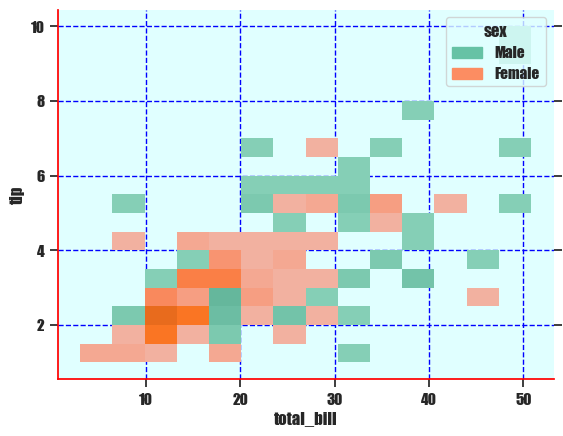

In [9]:
sns.histplot(x = "total_bill", y = "tip",
               hue = "sex",
               data = df)
plt.show()

In [10]:
sns.set_theme()

## **FacetGrid()**

**Seaborn** genera gráficas en dos niveles: A nivel de **axes** crea gráficas similares a las de Matplotlib pero con una plantilla predefinida. A nivel de **Figure** crea composiciones de gráficas, similar a **plt.subplots**. La principal de estas composiciones es la clase **FacetGrid()** que permite mapear un tipo de gráfica por filas o columnas de acuerdo a una variable cuantitativa.

En primer lugar, debe crearse una instancia de **FacetGrid()** asignándole como argumento el origen de los datos, así como las variables categóricas que se dividirán por filas y columnas.

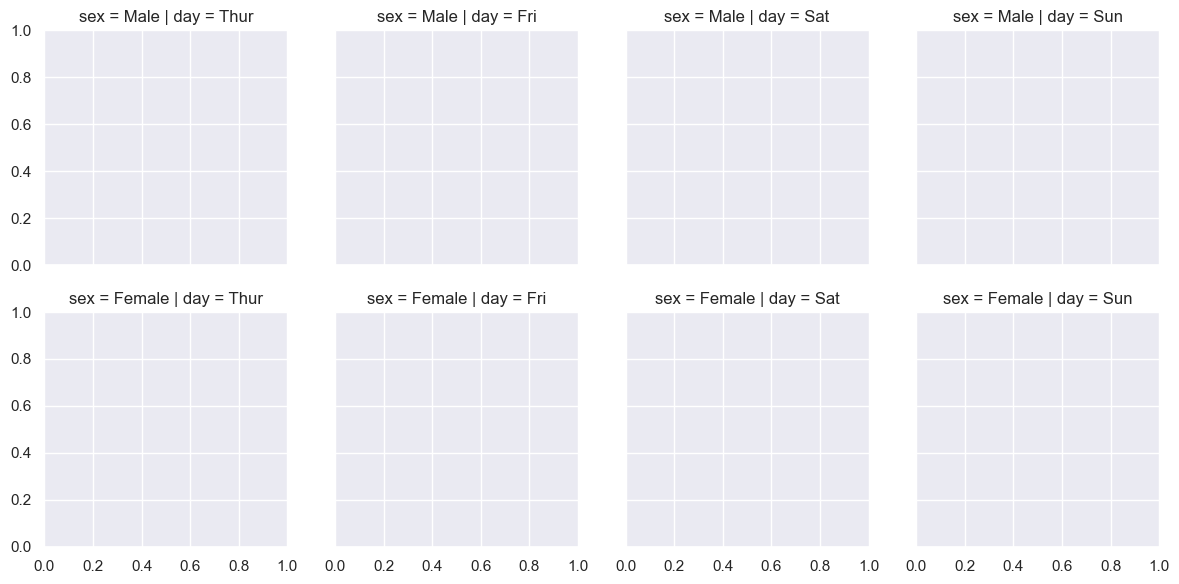

In [11]:
g = sns.FacetGrid(data=df, col="day", row="sex")
plt.show()

Después debe usarse una función para establecer el tipo de gráfico, las variables, y sus parámetros.

Para introducir los argumentos por posición:
```
g.map()
```
Para introducir los argumentos por nombre:
```
g.map_dataframe()
```

Para acceder a los atributos de cada **Axes** generado se usan atributos de la instancia y se accede a los atributos de todos los ejes. Por ejemplo,
```
g.set_axis_labels("A", "B")
```


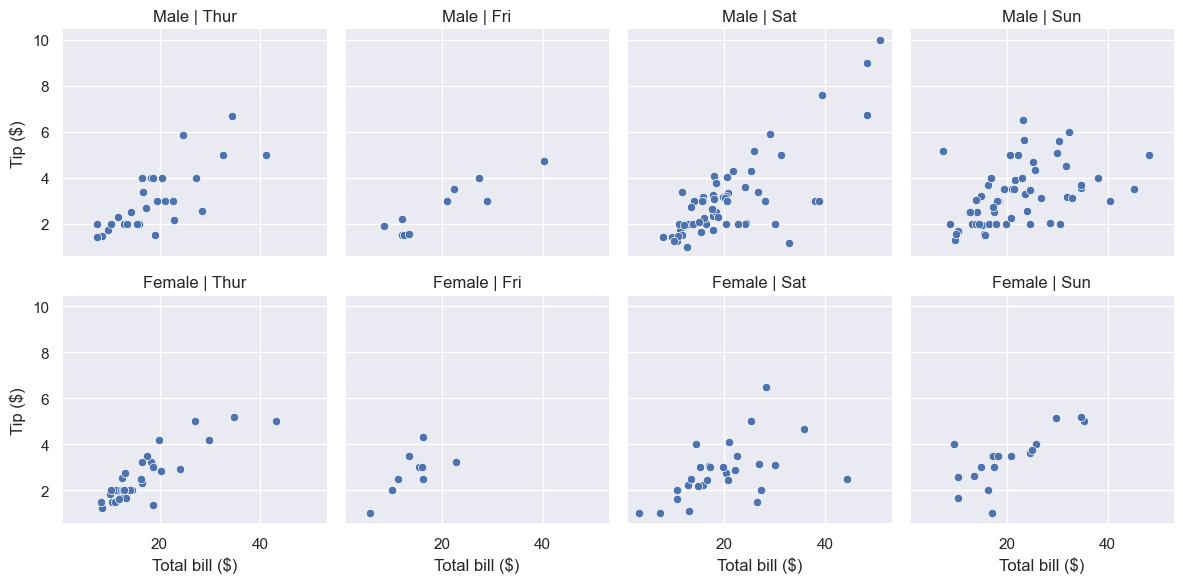

In [12]:
g = sns.FacetGrid(data=df, col="day", row="sex")
g.map_dataframe(sns.scatterplot, x = "total_bill", y = "tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")
g.tight_layout()
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.show()

Sin embargo, si se desea se puede acceder a los **Axes** directamente, generando un diccionario, cuyas llaves sean el par de etiquetas (fila, columna) y el valor del diccionario es el **Axes**.

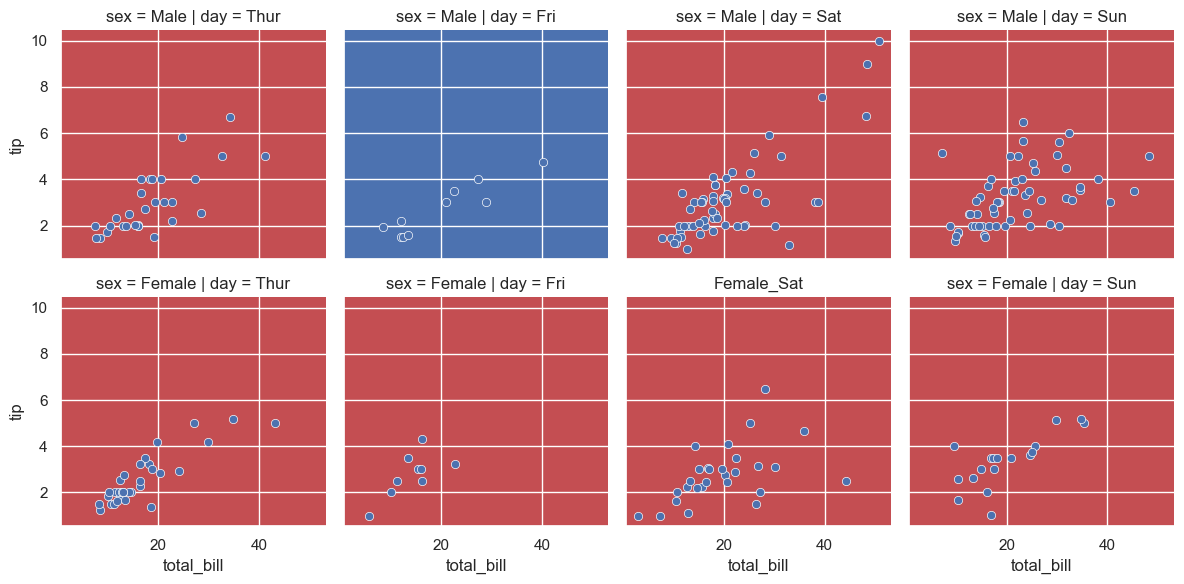

In [13]:
g = sns.FacetGrid(data=df, col="day", row="sex")
g.map_dataframe(sns.scatterplot, x = "total_bill", y = "tip")
axes_dict = g.axes_dict
for k, v in axes_dict.items():
  v.set_facecolor("r")
axes_dict[("Male", "Fri")].set_facecolor("b")
axes_dict[("Female", "Sat")].set_title("Female_Sat")
plt.show()

Algunos atributos de esta clase son:
* 'sharex' / 'sharey' Si son verdadero, ajusta los ejes por filas o columnas
* 'height' Controla la altura en pulgadas de cada **Facet** (cada gráfica)
* 'aspect' Controla la relación altura-ancho ('aspect'*'height'='width')

## **Distribuciones**

### Nivel de ejes

[**sns.histplot()**](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

(*ax-level*)
* Histogramas de una variable. Puede manejar
  * Estimaciones de densidad de kernel 'kde=True'
  * Una variable categórica por colores, con el argumento 'hue="name_var"'

* Heatmaps, usando los argumentos 'x' y 'y'.



 [**sns.kdeplot()**](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

(*ax-level*)
* Estimación de densidad de kernel.
  * Puede manejar clasificación mediante una variable categórica por colores, con el argumento 'hue="name_var"'

* Curvas de nivel de distribuciones bivariadas, usando los argumentos 'x' y 'y'.
  * El parámetro 'levels' establece el número de curvas de nivel




 [**sns.ecdfplot()**](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot)

(*ax-level*)
* Función de distribución acumulativa empírica (una variable)
  * Puede manejar clasificación mediante una variable categórica por colores, con el argumento 'hue="name_var"'

  


 [**sns.rugplot()**](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot)

(*ax-level*)
* Grafica las marcas en los ejes correspondiente a la distribución de datos.
  * Puede manejar clasificación mediante una variable categórica por colores, con el argumento 'hue="name_var"'
  * Puede manejar una variable con el eje 'x' o dos variables con el eje 'y'


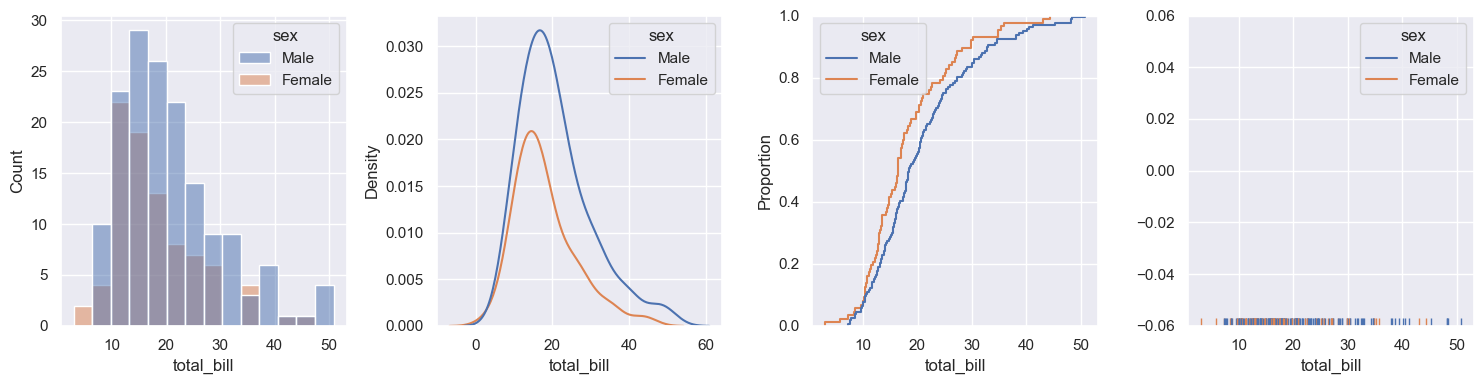

In [14]:
dist_func = [sns.histplot, sns.kdeplot, sns.ecdfplot, sns.rugplot]
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
for i, dist in enumerate(dist_func):
  dist(x = "total_bill", hue = "sex",
       data = df, ax=ax[i])
plt.tight_layout()
plt.show()

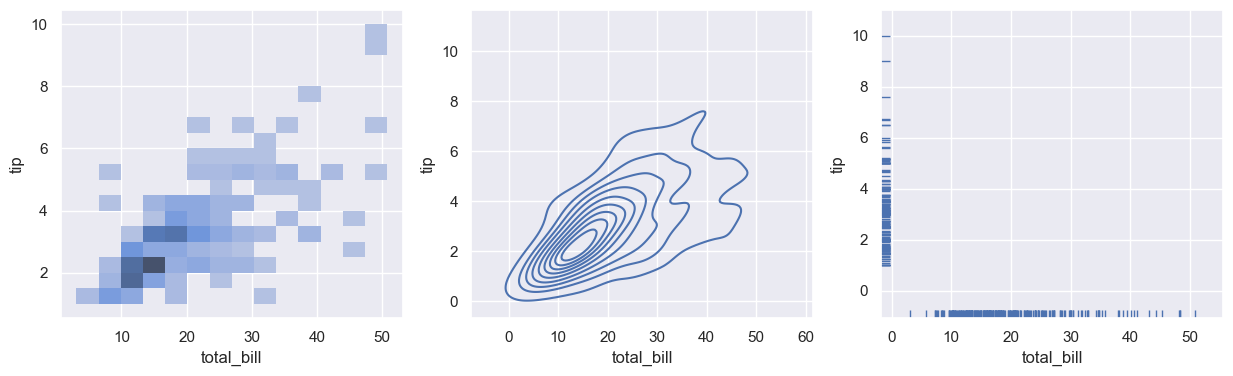

In [15]:
dist_func = [sns.histplot, sns.kdeplot, sns.rugplot]
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, dist in enumerate(dist_func):
  dist(x = "total_bill", y = "tip",
       data = df, ax=ax[i])
plt.show()

### Sobreponer gráficas

C:\Users\25517\AppData\Local\miniconda3\envs\projects\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\25517\AppData\Local\miniconda3\envs\projects\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\25517\AppData\Local\miniconda3\envs\projects\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\25517\AppData\Local\miniconda3\envs\projects\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommo

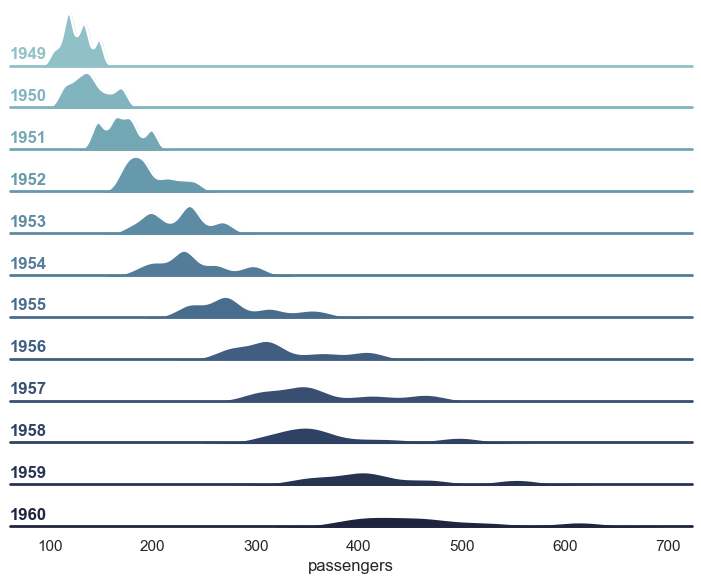

In [41]:
# Configurar el tema
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

flights = flights.copy()
flights["year"] = flights["year"].astype(str)

# Crear la paleta de colores
pal = sns.cubehelix_palette(len(df["year"].unique()), rot=-.25, light=.7)

g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette=pal)

g.map(sns.kdeplot, "passengers", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "passengers", clip_on=False, color="w", lw=2, bw_adjust=.5)

g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, "passengers")

g.figure.subplots_adjust(hspace=-.25)

g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

### Combinar gráficas

Los gráficos a nivel de eje puede combinarse directamente creando una **Figure** con 'plt.subplots()' y escribiendo secuencialmente las gráficas consideradas:


In [16]:
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
x, y = np.random.multivariate_normal(mean, cov, n).T
alpha = 0.3

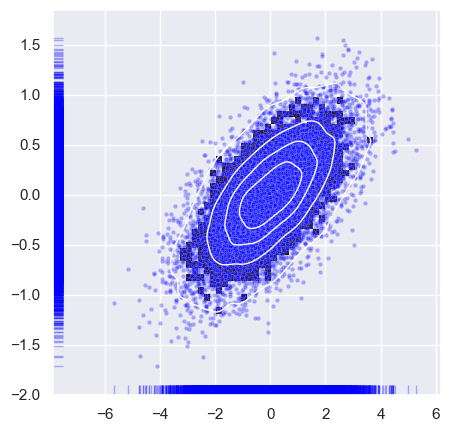

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.rugplot(x=x, y=y, color="blue", alpha=alpha)
sns.scatterplot(x=x, y=y, s=10, color="blue", alpha=alpha)
plt.show()

El orden en el que se definan las gráficas define el nivel de su visualización. El parámetro 'alpha', que está en la mayoría de las gráficas de seaborn, permite controlar el nivel de transparencia de las gráficas.

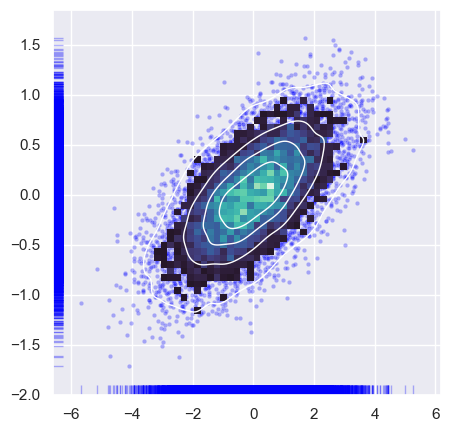

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=x, y=y, ax=ax, s=10, color="blue", alpha=alpha)
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)
sns.rugplot(x=x, y=y, color="blue", alpha=alpha)
plt.show()

### Nivel de figuras

 [**sns.displot()**](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

(*Figure-level*)

Permite generar diferentes gráficas de visualización de distribuciones univariados y bivariados.

Para controlar el tipo de gráfica se usa el argumento 'kind' con las siguientes opciones:
* 'hist' (histplot)
* 'kde' (kdeplot)
*  'ecdf' (ecdfplot)

Si es una gráfica bivariada o univariada depende si se ofrece el nombre de una o dos variables en los argumentos 'x' y 'y'.

Además, se puede agregar las marcas de eje usando el argumento 'rug=True'.


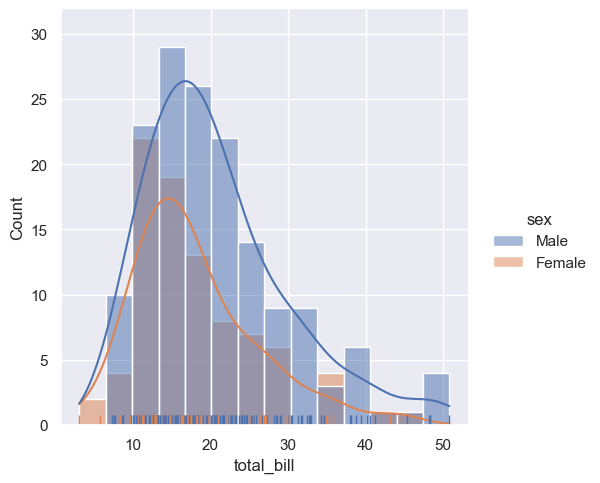

In [19]:
sns.displot(x = "total_bill", hue="sex",
            kind="hist", kde=True, rug=True,
            data = df)
plt.show()

Al ser un objeto **FacetGrid** permite comparar clases binarias no sólo usando colores (argumento 'hue'), sino por filas o columnas (argumentos 'col' y 'row')

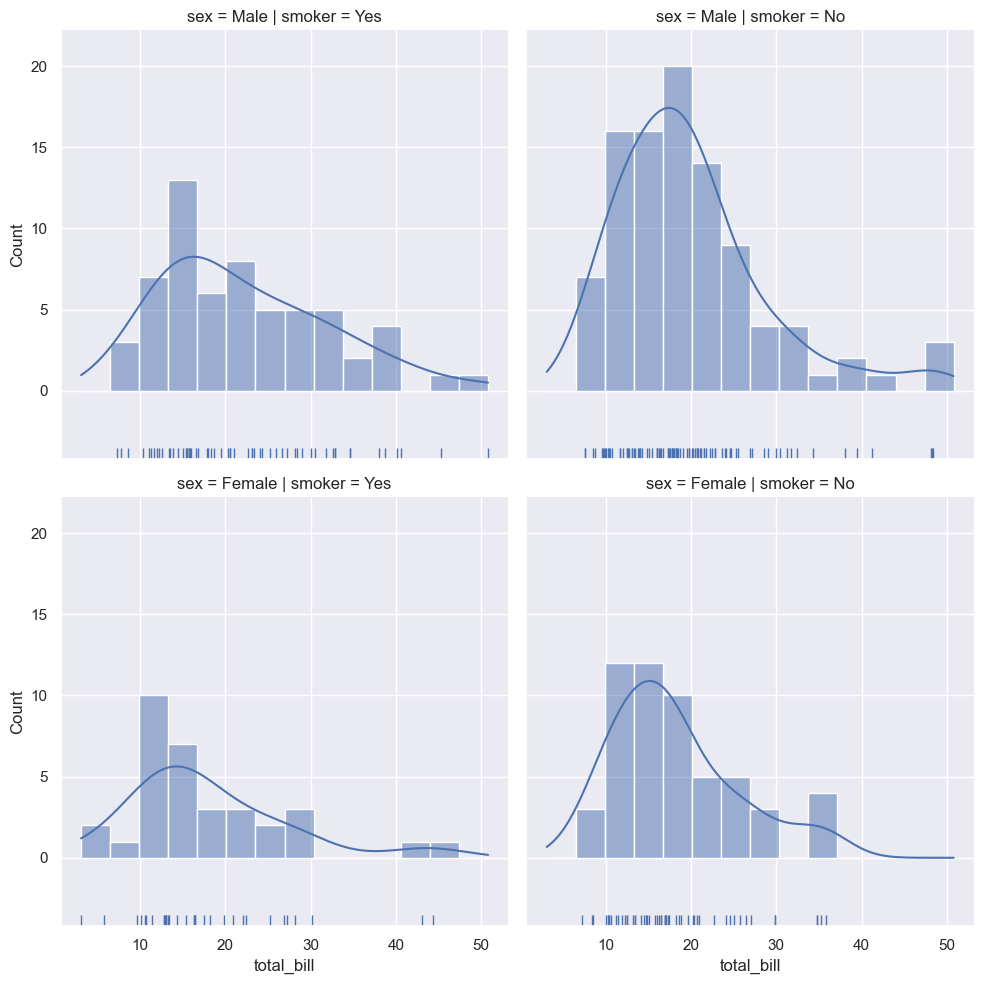

In [20]:
sns.displot(x = "total_bill", col = "smoker", row="sex",
            kind="hist", kde=True, rug=True,
            data = df)
plt.show()

 [**sns.jointplot()**](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

 (*Figure-level*)

Permite combinar gráficas de distribución bivariada (centro) con gráficas de distribución univariada en los ejes.

El tipo de gráfica bivariada se establece con el argumento 'kind' con las siguientes opciones:
* 'kde' (curvas de nivel + kde univariado)
* 'reg' (regresión + histograma y kde univariado)
* 'hist' (heatmap + histograma)
* 'hex' (hexbin + histograma)

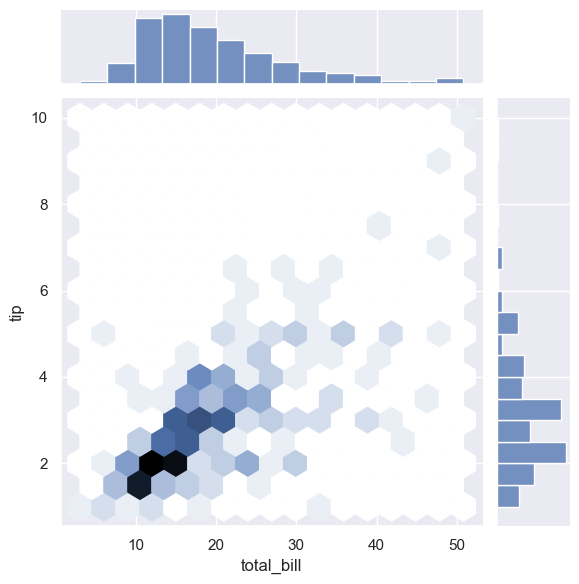

In [21]:
sns.jointplot(x= "total_bill", y="tip",
             kind = "hex",
             data = df,
             )
plt.show()

 [**sns.JointGrid()**](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)

 Es una función más general que crea una Figura con un **axes** central para la gráfica bivariada y dos **axes** extremos para distribuciones univariadas.

Al usar la función **sns.JointGrid()** se crea una instancia **Figure**, sobre la cual luego debe asignársele las gráficas que irán en el centro y los márgenes.

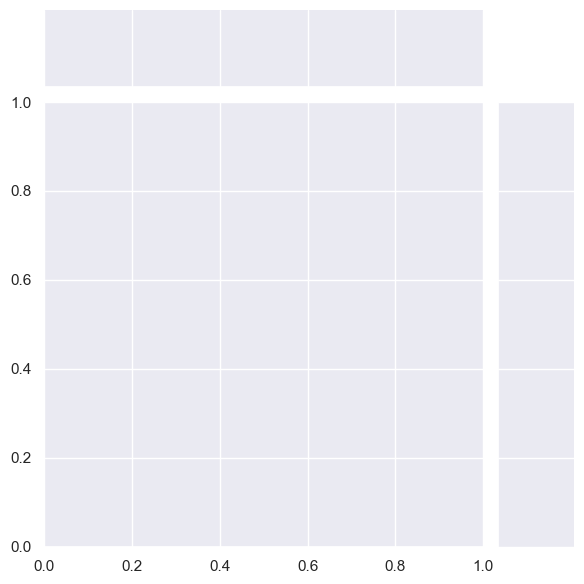

In [22]:
g = sns.JointGrid()
plt.show()

Se puede asignar estas gráficas usando una lista con:
* '.plot()'
O especificar la gráfica central y marginal, junto a sus argumentos usando:
* '.plot_joint()'
* '.plot_marginals()'

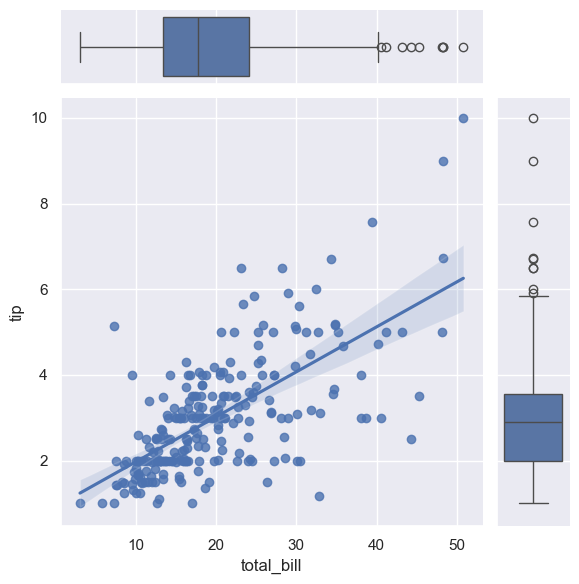

In [23]:
g = sns.JointGrid(x="total_bill", y="tip", data = df)
g.plot_joint(sns.regplot)
g.plot_marginals(sns.boxplot)
plt.show()

 [**sns.pairplot()**](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

  (*Figure-level*)

 Es una función a nivel de figura que genera una cuadrícula de **Axes**, donde en cada fila aparece una gráfica de distribución univariada, y en las demás celdas una gráfica bivariada para cada par de variables.

 El control del tipo de gráfica se realiza con los argumentos:
 * 'kind' (gráficas bivariadas)
 * 'diagonal_kind' (gráficas univariadas en la diagonal)

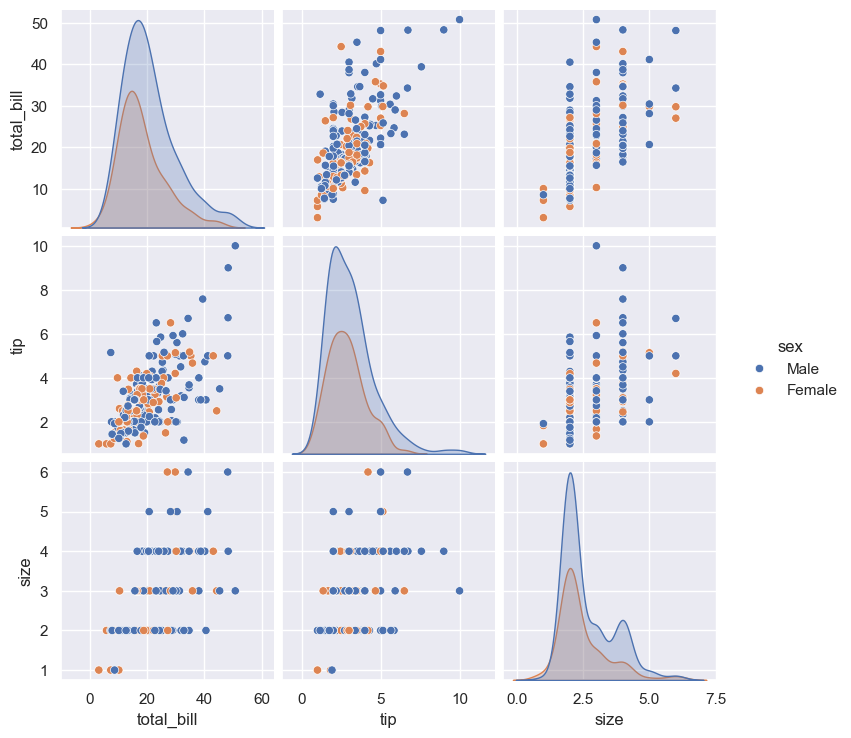

In [24]:
sns.pairplot(data = df, hue='sex',
             kind='scatter',
             diag_kind="kde")
plt.show()

## **Relación entre variables**

### Nivel de ejes

 [**sns.scatterplot()**](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

(*ax-level*)
* Gráficas de dispersión (2 variables cuantitativas). Permite manejar
  * Tercera variable categórica, por colores con el argumento 'hue' o por marcadores con el argumento 'style'
  * Tercera variable cuantitativa con el argumento 'size'


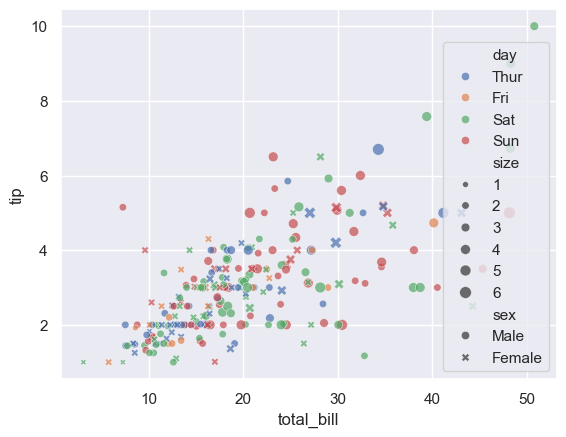

In [25]:
sns.scatterplot(x = "total_bill", y = "tip", data = df,
                hue = "day", size='size', style='sex', alpha=0.7)
plt.show()

 [**sns.lineplot()**](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

(*ax-level*)
* Gráfica una línea que relaciona dos variables 'x' y 'y.
* Permite clasificar por una tercera variable categórica usando:
  * colores, argumento 'hue'
  * Estilos de líneas, argumento 'style'

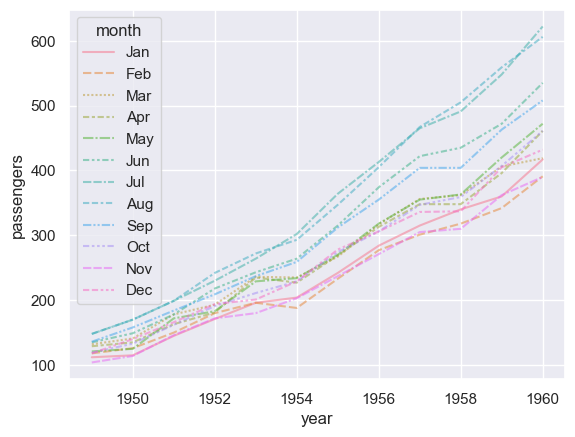

In [26]:
sns.lineplot(data=flights, x="year", y="passengers",
             hue="month", style="month", alpha = 0.5)
plt.show()

[**sns.heatmap()**](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

La librería también es capaz de generar mapas de calor, para matrices de valores numéricos. Sus principales atributos son:
* 'cmap' Paleta de color
* 'annot' Anotación de cada valor

In [27]:
brain = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

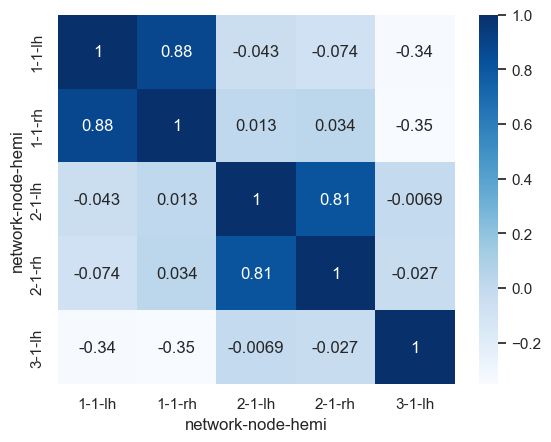

In [28]:
sns.heatmap(data=brain.iloc[:, :5].corr(), cmap="Blues",
            annot=True)
plt.show()

Otras gráficas de distribución/relación que dispone **Seaborn** a nivel de ejes son

*  [**sns.stripplot()**](https://seaborn.pydata.org/generated/seaborn.stripplot.html)
* [**sns.boxplot()**](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [**sns.violinplot()**](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
* [**sns.boxenplot()**](https://seaborn.pydata.org/generated/seaborn.boxenplot.html)

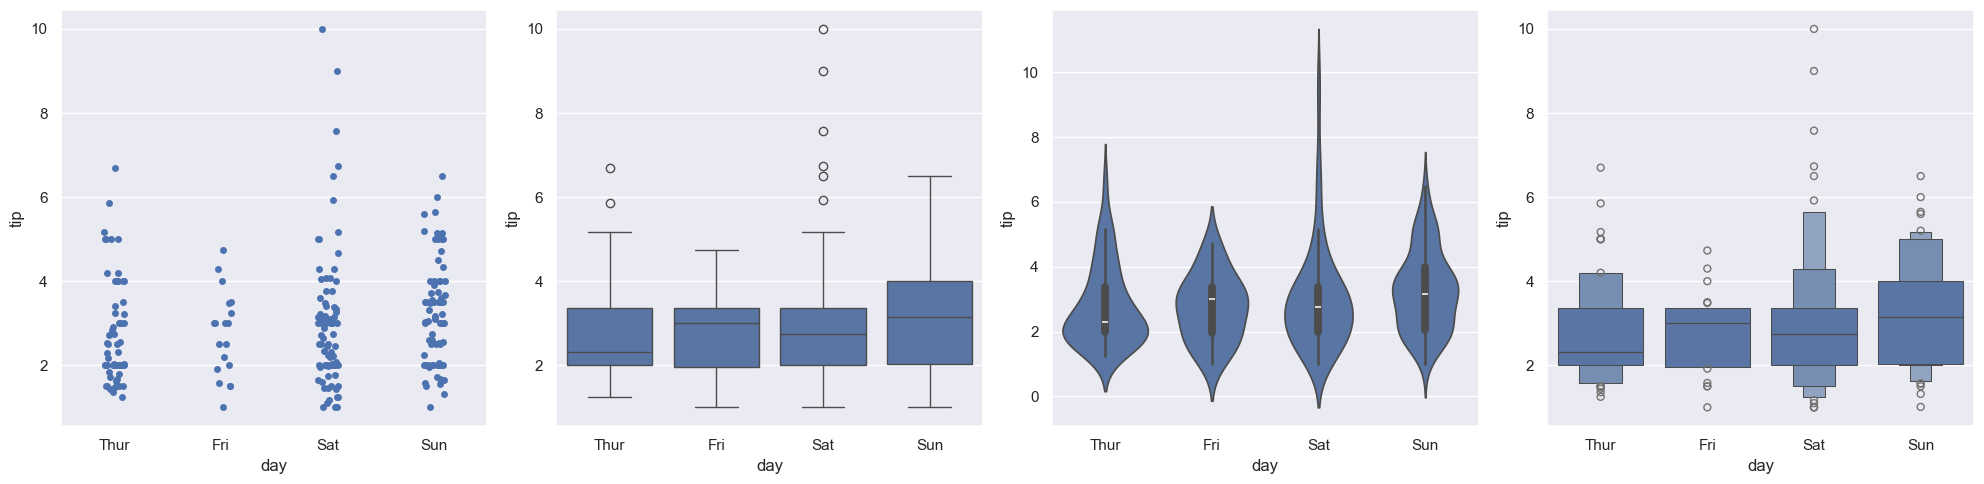

In [29]:
dist_func = [sns.stripplot, sns.boxplot, sns.violinplot, sns.boxenplot]
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, dist in enumerate(dist_func):
  dist(x  = "day", y = "tip",
       data = df, ax=ax[i])
plt.tight_layout()
plt.show()

Para estimar tendencias centrales y de dispersión existen tres gráficas:

* [**sns.pointplot()**](https://seaborn.pydata.org/generated/seaborn.pointplot.html)
* [**sns.barplot()**](https://seaborn.pydata.org/generated/seaborn.pointplot.html)
* [**sns.countplot()**](https://seaborn.pydata.org/generated/seaborn.pointplot.html)

Estas gráficas automáticamente agrupan una variable cuantitativa ('y') por una variable categórica ('x') calculando promedio y intervalos de confianza.

Para **pointplot()** y **barplot** es posible establecer:
* 'estimator' Función de estimación central
* 'errorbar' Método de las barras de error:
  * 'sd' Desviación estándar
  * 'ci' Intervalos de confianza
  * 'pi' Intervalos de percentil
  * 'se' Error estándar

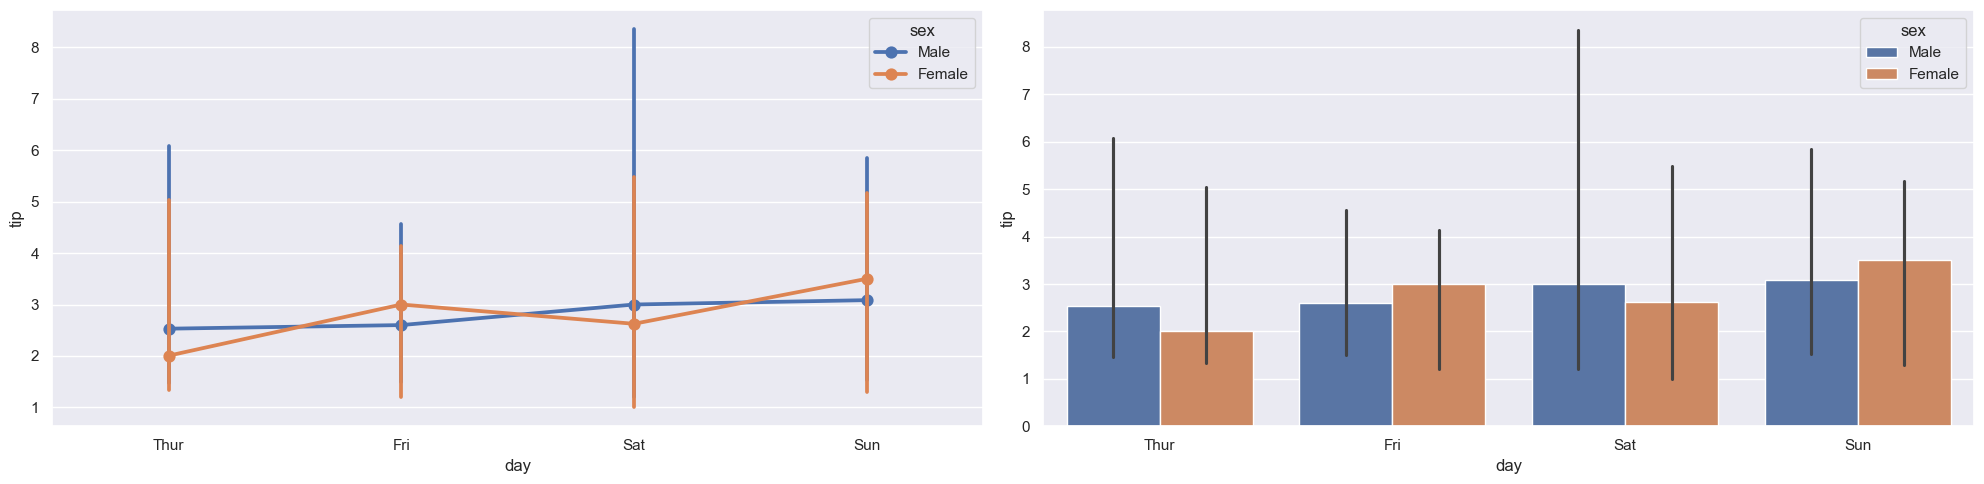

In [30]:
dist_func = [sns.pointplot, sns.barplot]
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
for i, dist in enumerate(dist_func):
  dist(x  = "day", y = "tip", hue='sex',
       estimator='median', errorbar='pi',
       data = df, ax=ax[i])
plt.tight_layout()
plt.show()

En el caso de la función **countplot()** sólo se puede pasar una variable 'x' categórica. La altura de la barra representará el estadístico seleccionado con el argumento 'stat':
* 'count'
* 'percent'
* 'proportion'
* 'probability'

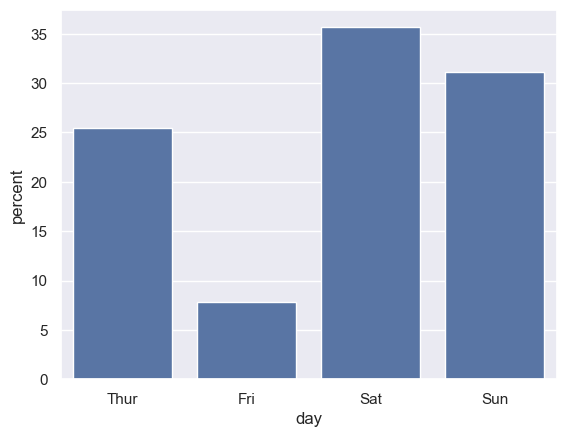

In [31]:
sns.countplot(x  = "day", data=df,
              stat='percent')
plt.show()

### Nivel de figuras

 [**sns.catplot()**](https://seaborn.pydata.org/generated/seaborn.catplot.html)

Es la gráfica a nivel de figura que sintetiza todas las gráficas categóricas, mediante el argumento 'kind=':
* 'strip'
* 'box'
* 'violin'
* 'boxen'
* 'point'
* 'bar'
* 'count´

Las variables se establecen con los argumentos 'x' y 'y'. Permite comparar otras variables categóricas mediante los argumentos:
  * 'hue' (por color)
  * 'row, 'col' (por posición en la cuadrícula)

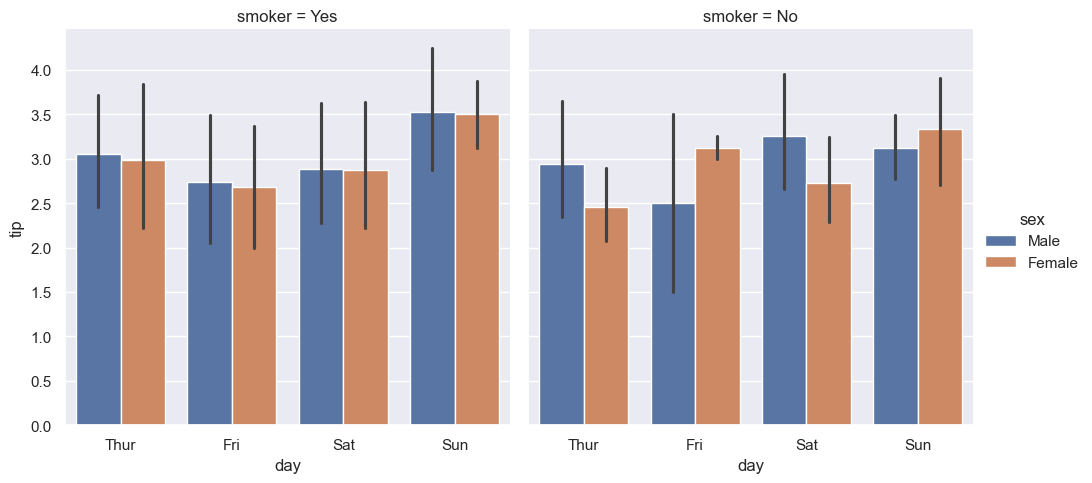

In [32]:
sns.catplot(x="day", y = "tip", data=df,
            col='smoker', hue='sex', kind="bar")
plt.show()

 [**sns.relplot()**](https://seaborn.pydata.org/generated/seaborn.relplot.html)

Es la gráfica de nivel figura que sintetiza la relación entre dos variables (gráficas de dispersión y de líneas). El tipo de gráfica depende del argumento 'kind=':
* 'scatter'
* 'line'


Es posible modificar el tipo de punto o línea mediante los argumentos:
* 'hue' (categórica por color)
* 'size' (cuantitativa por tamaño)
* 'style' (categórica por tipo de marcador o de línea)

Al ser una gráfica tipo **FacetGrid** permite también hacer comparaciones por filas y columnas con los argumentos 'row', 'col'.

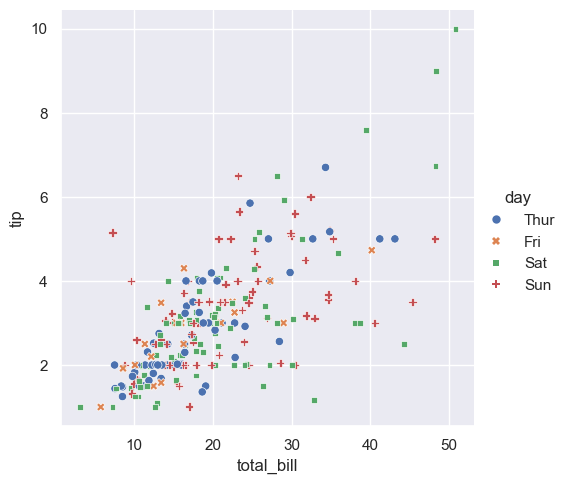

In [33]:
sns.relplot(x = "total_bill", y="tip", data=df,
             style='day', hue='day')
plt.show()

## **Modelos estadísticos**

La librería tiene algunas gráficas que a la par realizan y visualización modelos estadísticos. Estos son:




### Nivel ejes

Gráfica de dispersión con regresión
* [**sns.regplot**](https://seaborn.pydata.org/generated/seaborn.regplot.html)

Gráfica de residuos
* [**sns.residplot**](https://seaborn.pydata.org/generated/seaborn.regplot.html)

La regresión lineal permite establecer el tipo de intervalo de confianza estableciendo el atributo 'x_ci':
* 'ci' Itervalo de confianza
* 'sd' Desviación estándar
El atributo 'ci' puede ser 'None' o un entero del 0 al 100 para indicar el intervalo de confianza.

También se puede configurar el orden de la regresión (polinómica) con el atributo 'order'

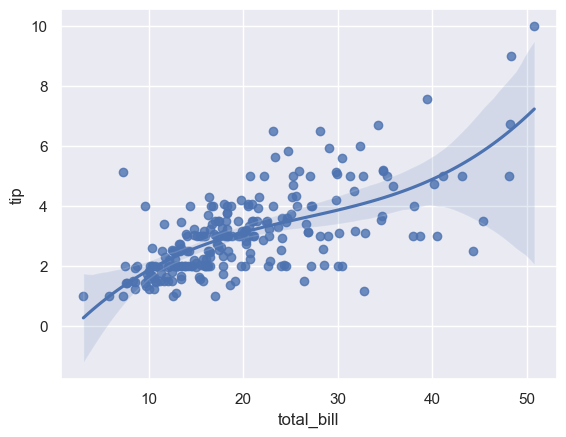

In [34]:
sns.regplot(x = "total_bill", y="tip", data=df,
            x_ci="sd", order=3, ci=99)
plt.show()

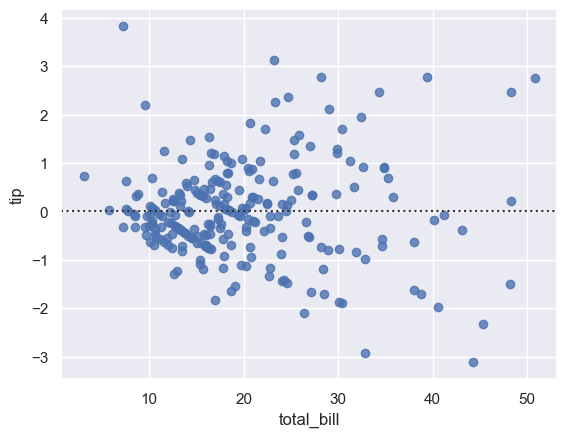

In [35]:
sns.residplot(x = "total_bill", y="tip", data=df,
            order=3)
plt.show()

### Nivel figura

Es la gráfica de nivel figura que combina 'sns.regplot()' en un **FacetGrid**.

Esta enfocada para crear modelos de ajuste de regresión através de subconjuntos condicionales de un conjunto de datos, utilizando las variables condicionales como columnas, filas o colores.
* [**sns.lmplot**](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

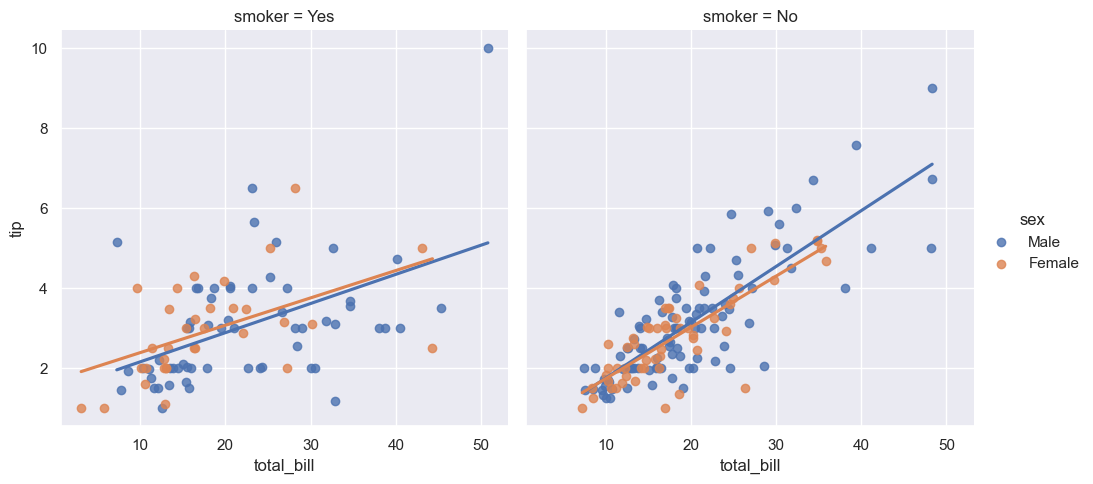

In [36]:
sns.lmplot(x = "total_bill", y="tip", data=df,
            hue="sex", col="smoker", ci=None)
plt.show()

## **Otras gráficas**

### Nivel ejes

[**sns.heatmap()**]https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Aunque es posible generar un mapa de calor usando 'sns.histplot()', Seaborn tiene una opción directa, que es muy útil para graficar matrices, como la matriz de correlación o la matriz de confusión.

Algunos argumentos de la función son:
* 'vmin', 'vmax': Valores para limitar el mínimo y máximo de la escala de colores.
* 'cmap': Paleta de colores
* 'center': Establece el centro de la escala de colres cuando se usan datos divergentes.
* 'annot=True': Para mostrar el valor de cada celda.


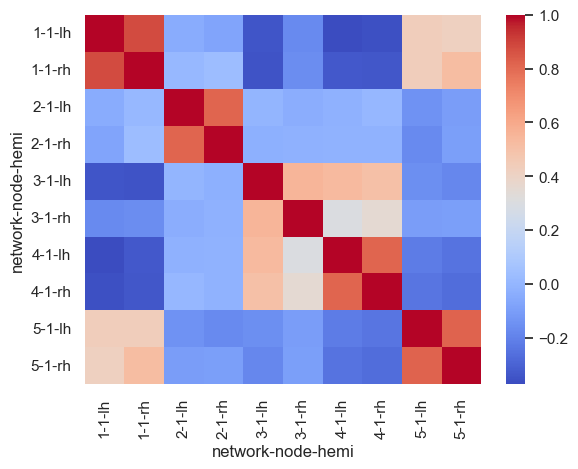

In [37]:
correlation_matrix = brain.iloc[:, :10].corr()
sns.heatmap(correlation_matrix,
            annot=False,
            cmap="coolwarm")
plt.show()

### Nivel Figura

[**sns.clustermap()**](https://seaborn.pydata.org/generated/seaborn.clustermap.html)

Es un dendograma junto a un mapa de calor proveniente de una agrupación de los datos.

Esta función utiliza un método de agrupación jerárquico utilizando la función
```
scipy.cluster.hierarchy.linkage()
```





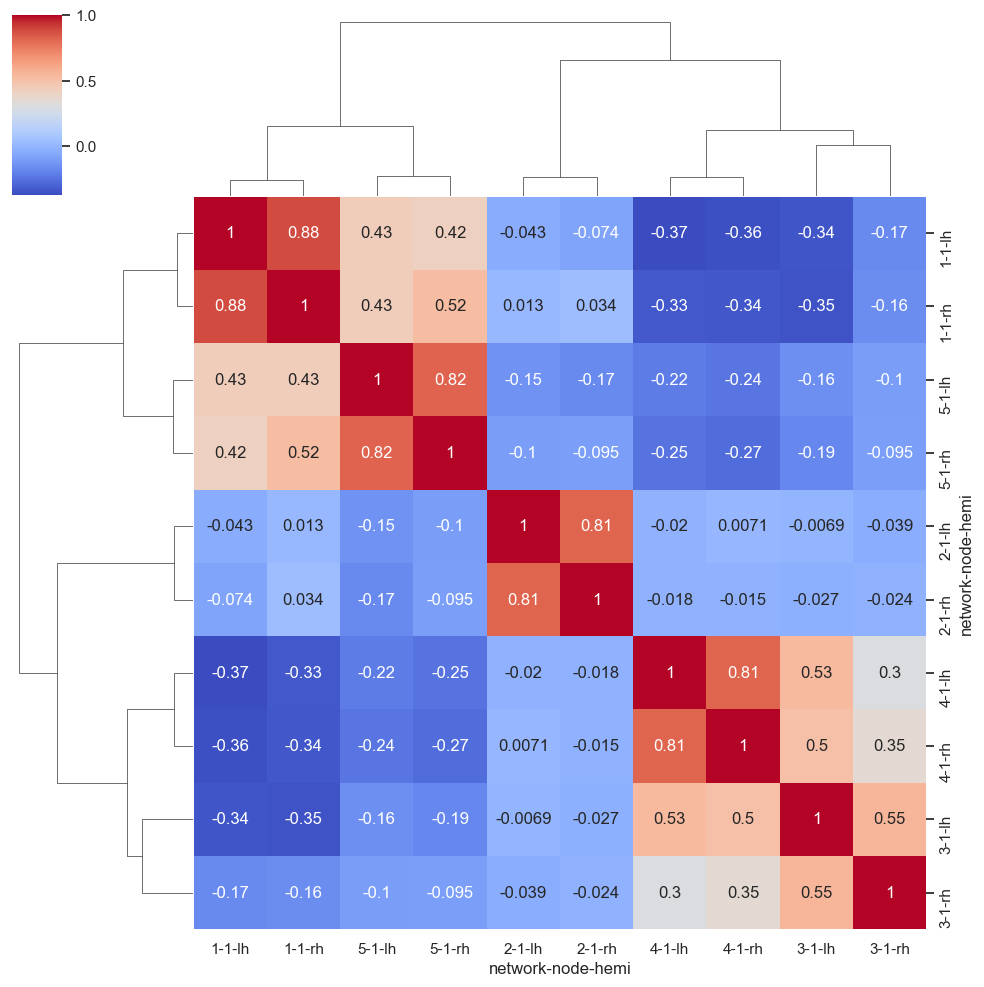

In [38]:
sns.clustermap(brain.iloc[:, :10].corr(),
               annot=True,
               cmap="coolwarm")
plt.show()